# Data visualization with Python

A picture is worth a thousand words. This is even more true for data analysis, and particularly when the data are large, complex and multi-dimensional. We need to look at our data to make sure that it represents what we think it does and we often need to show our data in order to communicate well with others. 

There are many different ways to visualize data in Python. In fact, there are so many different options that serve every imaginable use-case, that there is a website devoted to helping users sort out what tool to use for what purpose. As an example, the following diagram is taken from that website: 

![](images/pyviz_options.png)


As you can see, the universe of Python visualization divides roughly into a few constellations around some major stars. One of the main decisions that you need to make is whether you need very high performance (in which case, you might want to program in one of the libraries that interact directly with OpenGL, in green in the lower left), whether you are primarily targeting presentation of the visualizations in the browser (in which case, interaction with javascript may be desirable, and you might be in the top left, in red), or whether you would like to rely on Matplotlib (which puts you in the top right, in purple). 

The point is that you will have to consider all of these options and choose something that works well for you. And this might involve some trial and error. 

For today, we will start with Matplotlib. There are a few reasons to get started there. The first is that it may very well be the easiest of all of these to teach and to learn. It is also a pretty good choice, becuase it is very popular in the scientific Python ecosystem, and because it is a very well-supported by a large community of developers. 

Matplotlib was started by a neuroscientist, John Hunter, while he was a postdoc at the University of Chicago. Within a few years, together with the rest of the scientific Python ecosystem, Matplotlib took off in popularity, and John left neuroscience to work at a Chicago-based hedge-fund, while still maintaining the library. Having learned about the challenges of software sustainability, he was among the founders of Numfocus, which is a non-profit that serves as the fiscal sponsor for many projects in this ecosystem (enabling them to take contributions, accept grants, and so on). The community around Matplotlib grew and now encompasses more than 1,000 contributors. The library and its visual style became familiar through images such as the images that described the first recording of gravitational waves by the LIGO collaboration: 

![](images/ligo_mpl.png)

Or the famous images of a black hole created by the Event Horizon Telescope team.


![](images/black_hole_mpl.png)

This picture is cool not only because it's a ground-breaking result and it was also made with Matplotlib, seen on that laptop screen, but it also seems to have captured the moment that this result was obtained and the excitement of the researchers (Katie Bouman, at the time at MIT, and now at Caltech, who led the image processing effort that led to this result).

In other words, if you use Matplotlib, you are almost guaranteed to make ground-breaking discoveries! 

Presenting graphical information is complicated business and Matplotlib is a rather large and complicated library. There are different ways to call functions that would do similar things, depending on the level of detail that you would like to adopt. This makes it a bit hard, because you have to decide at which level you would like to call Matplotlib. However, there is one particular API that is almost always the right choice for a good balance of flexibility and expressivity, and I strongly recommend to always use this API. This is the API that we will learn here. 

This API relies on the creation of two separate objects that interact with each other, and the manipulation of the properties of these objects. These are a `Figure` object and an `Axes` object. The `Figure` is a bit like a page on which the data will be presented. The `Axes` object is the canvas that contains the coordinate frame for data presentation. Let's look at the simplest possible example of creating these. First, we import the sub-module that contains this particular API, `matplolib.pyplot`. You can name it anything you want, but it is a rather strong convention to name it `plt`

In [1]:
import matplotlib.pyplot as plt

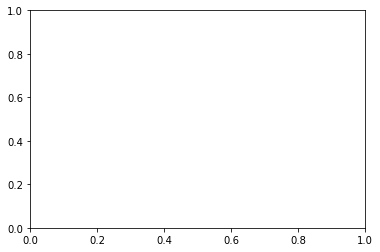

In [2]:
fig, ax = plt.subplots()

At this point all we have is the coordinate frame. But the `Axes` object (which we have named `ax` in this example) has methods that can be used to add data into the coordinate frame. So, if we contine within the same cell, we can start adding data to the `Axes`. We'll start by using the `ax.plot` method. The default of this method is to draw a line.  For now, let's keep things really simple, before looking at some real data. 

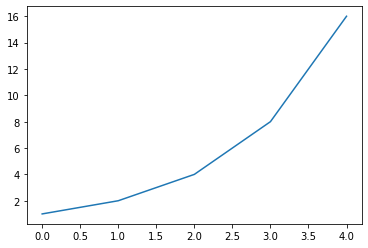

In [9]:
fig, ax = plt.subplots()

ax.plot([1, 2, 4, 8, 16])

If only one sequence is provided, `plot` assumes that this is uniformly sampled and puts the values on y. If two sequences are provided, the first sequence is taken to be the x coordinates, and the second sequence is taken to be the y coordinates

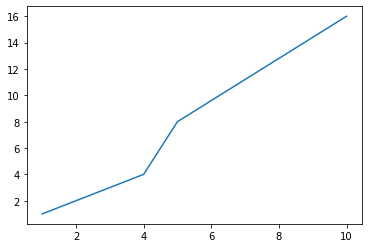

In [10]:
fig, ax = plt.subplots()
ax.plot([1, 2, 4, 5, 10], [1, 2, 4, 8, 16])  # Two sequences are provided => first is x coordinates, second is y coordinates

Matplotlib plotting also plays nice with Pandas data structures. For an example, let's look at a neuroscience dataset stored as a tsv file. This is the ABIDEII dataset (if you attended the machine learning tutorial, this dataset should be familiar to you). It contains measurements from more than 1,000 individuals, approximately half of which have been diagnosed with autism. The measurements were processed with Freesurfer, and for every individual, we have surface area, volume, cortical thickness, and local gyrification index in 360 different cortical regions of interest. The data also includes a few variables of phenotypic data such as age, sex and whether they are diagnosed with autism (group=1), or not (group=2).

In [49]:
import pandas as pd

In [50]:
abide = pd.read_csv('/home/jovyan/data/abide2.tsv', sep='\t')

In [51]:
abide.head()

,site,subject,age,age_resid,sex,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,13.642852,2.0,1.0,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,16.081732,2.0,1.0,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,12.866264,1.0,2.0,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,13.698139,1.0,1.0,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,14.772459,2.0,2.0,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


Let's visualize the average surface areas of visual cortical areas in the left hemisphere. We can select only these columns using the `filter` method of the `DataFrame` object:

In [52]:
area_visual_l = abide.filter(like="fsArea_L_V")

We extract the mean values in each column using the `mean` method:

In [54]:
mean_area_visual_l = area_visual_l.mean()

The resulting object is a Pandas `Series` object:

In [61]:
mean_area_visual_l

fsArea_L_V1_ROI      3161.415339
fsArea_L_V6_ROI       395.445219
fsArea_L_V2_ROI      2613.914343
fsArea_L_V3_ROI      1747.647410
fsArea_L_V4_ROI      1298.107570
fsArea_L_V8_ROI       262.410359
fsArea_L_V3A_ROI      548.596614
fsArea_L_V7_ROI       191.146414
fsArea_L_V3B_ROI      250.449203
fsArea_L_VIP_ROI      352.148406
fsArea_L_V6A_ROI      159.583665
fsArea_L_VMV1_ROI     270.120518
fsArea_L_VMV3_ROI     218.191235
fsArea_L_V4t_ROI      183.193227
fsArea_L_V3CD_ROI     294.676295
fsArea_L_VMV2_ROI     211.478088
fsArea_L_VVC_ROI      484.571713
dtype: float64

Next, we use `ax.plot` passing this series in as input. Matplotlib automatically inserts the values in the index as x tick labels. Because these are long, we will use the `ax.tick_params` method to rotate them 90 degrees, to avoid them colliding with each other.

We will also start using the best practices in annotating our axes with labels, using the `ax.set_xlabel` and `ax.set_ylabel` methods to insert labels: 

Text(0, 0.5, 'Area ($mm^2$)')

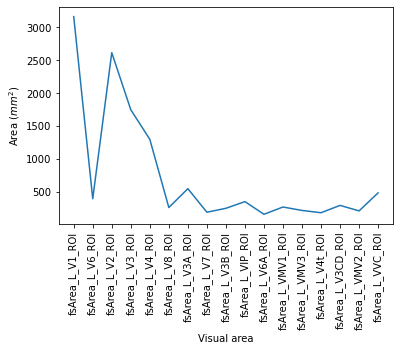

In [63]:
fig, ax = plt.subplots()
ax.plot(mean_area_visual_l)
ax.tick_params(axis='x', labelrotation = 90)
ax.set_xlabel("Visual area")
ax.set_ylabel("Area ($mm^2$)")

Matplotlib accepts the "$" sign as a marker that the enclosed text should be rendered in latex math style. This means that we can do things like use `^` for a superscript, but we can also write more complicated math into these labels if we need to. 

area_visual_r = abide.filter(like="fsArea_R_V")

Text(0, 0.5, 'Right V1 area ($mm^2$)')

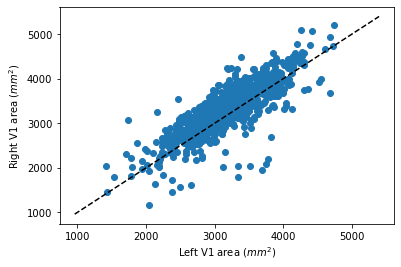

In [75]:
fig, ax = plt.subplots()
ax.scatter(abide["fsArea_L_V1_ROI"], abide["fsArea_R_V1_ROI"])
ax.plot(ax.get_ylim(), ax.get_ylim(), 'k--')
ax.set_xlabel("Left V1 area ($mm^2$)")
ax.set_ylabel("Right V1 area ($mm^2$)")